<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_12_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest



Los arboles de desicion se ajustan muy bien a los datos de entrenamiento, sin embargo no permiten generalización. El overfiting es la caracteristica mas importante. Para dar solucion, se propone el algoritmo de random foreset basado en dos caracteristicas:

# 1. Se enetrenan varios árboles con diferentes subconjuntos del dataset original. Para ello se emplea bootstraping dentro de los datos del dataset inicial.


Dado un dataset con las siguientes caracteristicas:


|index|$y^{}$          |X1  |X2 |X3 |X4 |
|-|----------|-----|-----|-----|-----|
|1| |$y^{(1)}$ |$X_1^{1}$|$X_2^{1}$|$X_3^{1}$|$X_4^{1}$|
|2||$y^{(2)}$ |$X_1^{2}$|$X_2^{2}$|$X_3^{2}$|$X_4^{2}$|
|3||$y^{(3)}$ |$X_1^{3}$|$X_2^{3}$|$X_3^{3}$|$X_4^{3}$|
|4||$y^{(4)}$ |$X_1^{4}$|$X_2^{4}$|$X_3^{4}$|$X_4^{4}$|


Podemos definir como un hyperparametro el número de arboles, y también los datos que ingresan a cada árbol, para ello emplearemos la tecnica de [bootstraping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics).


El botstrapping es una técnica de muestreo con reposición que se realiza para cada árbol, asi si se tienen 10 árboles, el muestre con reposicion  para los indices puede ser como sigue:
```

In: np.random.randint(0, 4, (10,4))

  
Out: array([[1, 0, 3, 3],
       [2, 1, 2, 0],
       [2, 3, 3, 3],
       [0, 2, 2, 3],
       [2, 0, 3, 3],
       [1, 1, 2, 0],
       [2, 2, 1, 2],
       [3, 0, 1, 0],
       [3, 1, 0, 2],
       [2, 0, 2, 0]])

```

Lo anterior quiere decir que el conjunto de datos del árbol 1, puede ser entrenado con las  X1, X2, X3, X4 con los datos de entrenamiento 2, 1, 2, 0


Cada fila del anterior array es usado como input para entrenar cada arbol, notese que los valores se puden repetir para entrenar el árbol i-esimo. 


- Para cada nodo de todos los arboles se selecciona un número aleatorio de características, hasta cosntruir el árbol completo. 


Al final se tendran un conjunto de arboles de desición sobre los cuales se aplicará agregación, es decir, cuando se pasa un nuevo dato de entrenamiento los arboles realizan la clasificación y se toma el valor elegido por la mayoria de los arboles



bagging = Agregation + bootstraping


Random forest permite seleccionar las caracteristicas más importantes


La estategia para optimizar los bosques pueden ser elegidos como sigue:

Fijar el numero de caracteristicas y el criterio de parada.

1. Determinar el error como función del número de árboles.

2. Definido el número de árboles y calculamos el error como función del numero de caracteristicas.

3. Con el numero de arboles fijo y el numero de caracteristicas, se optmiza el criterio de parada, (numero minimo de datos de una hoja)




REF: https://www.youtube.com/watch?v=3pa0vtW64Ic&ab_channel=CodificandoBits
https://en.wikipedia.org/wiki/Bootstrap_aggregating

ref: http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf

ref : https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb


In [ ]:
#https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


Laboratorio: 

1. Cargar load digitis
```python
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[95])
plt.show()
```

2, Aplicar random foreset usando sklearn

In [1]:
#Run this if you want to force to use CPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

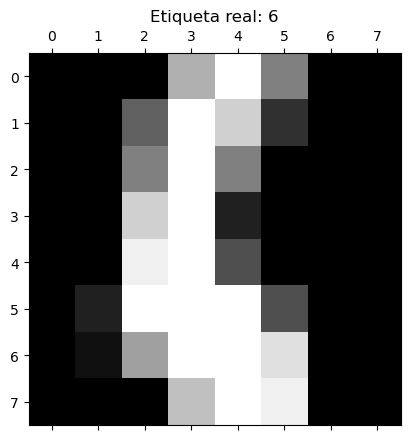

In [4]:
plt.gray()
plt.matshow(digits.images[95])
plt.title(f"Etiqueta real: {digits.target[95]}")
plt.show()

In [5]:
X = digits.data
y = digits.target


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [6]:
rf = RandomForestClassifier(
n_estimators=100,
random_state=42
)


rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Random Forest: {accuracy:.4f}")

Accuracy del modelo Random Forest: 0.9722


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



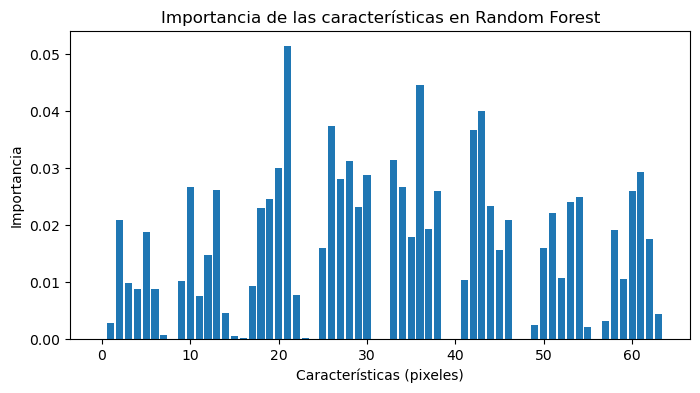

In [9]:
importances = rf.feature_importances_


plt.figure(figsize=(8, 4))
plt.bar(range(len(importances)), importances)
plt.xlabel("Características (pixeles)")
plt.ylabel("Importancia")
plt.title("Importancia de las características en Random Forest")
plt.show()

En este laboratorio se utilizó el dataset Digits para entrenar un modelo de Random Forest. El modelo logró una alta precisión en la clasificación de los dígitos escritos a mano, demostrando la efectividad de los métodos de ensamble para problemas de clasificación.